In [1]:
import torch

import numpy as np

from training_utils.file_utils import open_json, log_kfold_training
from training_utils.model_utils import load_dataset, split_dataset
from custom_thermonet.training import k_fold_training


In [2]:
NAME = "all_v3/"
DATASET_DIR = "../data/main_dataset_creation/outputs/"+NAME
LOG_NAME = "Thermonet"
KEEP_MODELS = False

In [3]:
config = open_json("thermonet_config.json")
features = ["direct_voxel_features"]

In [4]:
if torch.cuda.is_available() and config["use_cuda"]:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(device)


cuda


In [5]:
def load_voxel_features(row):
    row["direct_voxel_features"] = np.load(row["direct_voxel_path"])
    return row


### Training

In [6]:
# SIMPLE TRAIN
df = load_dataset(config, features)
df = df[(df.ddG < 0)]
print(len(df))

df["direct_voxel_path"] = df["direct_voxel_path"].apply(
    lambda row: row.replace("./",
                            "../compute_mutated_structures/")+".npy")
df["direct_voxel_features"] = df["direct_voxel_path"].apply(np.load)

all_training_results = {"simple_train": [],
                        "total_training_time": 0}
print(f"{type(all_training_results)=}")

# add protein_index to the dataset and get ksplit:
df = split_dataset(df, config)
training_results, model_list = k_fold_training(
    df, config, features, device, keep_models=KEEP_MODELS)


training on 6038 data
4236
type(all_training_results)=<class 'dict'>


100%|██████████| 5/5 [01:29<00:00, 17.94s/it]


type(all_training_results)=<class 'dict'>


'./outputs/Thermonet_3'

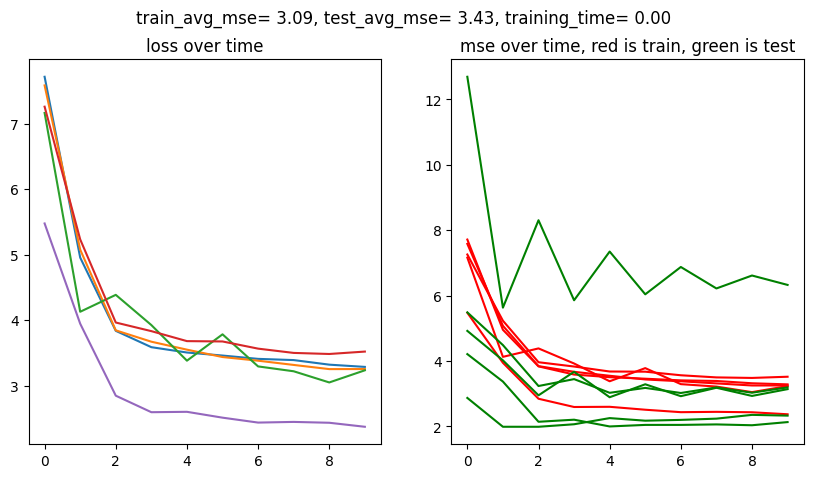

In [7]:
all_training_results = {}
# add training results to all the other ones
all_training_results["simple_train"] = training_results
print(f"{type(all_training_results)=}")


# save results to output
log_kfold_training(LOG_NAME, all_training_results,
                   config, features, "Thermonet")
